# TEJHAN BHARADWAJ RAMKUMAR


# KH50252

# tejhanb@gmail.com

In [118]:
import numpy as np
from sklearn.datasets import fetch_mldata
import os
import copy

In [29]:
#fetch the file from the system
file_location = os.path.join("/","Users","tejhanbharadwajramkumar","Desktop","Data Science")
image_file_location = os.path.join(file_location, "mnist_data.txt")
label_file_location = os.path.join(file_location, "mnist_labels.txt")
#open the file
imagefile = open(image_file_location,'r')
labelfile = open(label_file_location,'r')
imagedataset = imagefile.readlines()
labeldataset = labelfile.read()
#length of the image_dataset
Sizeofdataset =  len(image_dataset)

In [31]:
traindata = np.zeros((Size_of_dataset, 784))

In [32]:
for variable in range(len(image_dataset)):
    temporary_list = list(image_dataset[variable].split(" "))
    temporary_image = np.array(temporary_list, dtype='float')
    #moving the data to temporary_image so that changes wont affect
    traindata[variable] = copy.deepcopy(temporary_image)   

In [33]:
trainlabel = np.fromstring(label_dataset, dtype=float, sep=' ')

In [34]:
image_file.close()
label_file.close()

In [35]:
#Normalizig the data
traindata = traindata/255.0

In [36]:
traindata = traindata.transpose()
trainlabel = trainlabel.reshape(1,trainlabel.shape[0])

In [37]:
#Converting other numbers in the trainlabel to 0
trainlabel_1 = trainlabel
trainlabel_1[trainlabel_1 != 8] = 0
trainlabel_1[trainlabel_1 == 8] = 1

trainlabel = trainlabel_1

# Implementing gradient descent

In [73]:
#sigmoid function
def sigmoid(z):
    val = 1.0 / (1.0 + np.exp(-z))
    return val

In [74]:
def propagate(w, b, X, Y, lambda_value):
    
    v = X.shape[1]
    #forward propogation
    z = np.dot(w.T,X)+b
    A = sigmoid(z)
    lamb = ((lambda_value*(w.transpose()*w))/2)
    #compute the cost
    cost = -1.0/v*(np.sum(Y*np.log(A)+(1.0-Y)*np.log(1.0-A))+lamb)
    #backward propogation
    dw = 1.0/v*np.dot(X, (A-Y).T)
    db = 1.0/v*np.sum(A-Y)
    
    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    
    cost = np.squeeze(cost)
    
    gradiant = {
        "dw":dw, 
        "db":db}
    
    return gradiant, cost

In [75]:
#optimize w and b
def optimize(w, b, X, Y,iterations, learning_rate, lambda_value, print_cost = False):

    costs = []
    
    for i in range(iterations):
        #cost and gradient
        gradiant, cost = propagate(w, b, X, Y, lambda_value)
        #get value from grads
        dw = gradiant["dw"]
        db = gradiant["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
    #dictionary        
    gradiant = {"dw": dw, "db": db}
    parameter = {"w": w, "b": b}
        
    return parameter, grads, costs

In [76]:
#To predict wheather the label is 0 or 1
def predict (w, b, X):
    
    v = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    #compute vector A predicting the proability
    A = sigmoid (np.dot(w.T, X)+b)
    #probability to actual prediction
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            Y_prediction[:, i] = 1
        elif (A[:,i] <= 0.5):
            Y_prediction[:, i] = 0
    #test the condition         
    assert (Y_prediction.shape == (1,m))
    
    return Y_prediction

In [113]:
def model (X_traindata, Y_traindata, X_testdata, Y_testdata, num_iterations = 1000, learning_rate = 0.5, lambda_value = 0, print_cost = False):
    #initialize with 0
    w = np.zeros((X_traindata.shape[0],1))
    b = 0
    #gradiant descent
    parameters, gradiant, costs = optimize(w, b, X_traindata, Y_traindata, num_iterations, learning_rate, lambda_value, print_cost)
    #get the parameters from the dictionary metioned above
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict (w, b, X_testdata)
    Y_prediction_train = predict (w, b, X_traindata)
    #Finding the accuracy and errors
    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_traindata)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(Y_prediction_test-Y_testdata)*100.0)
    #dictionary
    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations,
         "test_accuracy": test_accuracy,
         "train_accuracy": train_accuracy}

    return d

In [114]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
d1 = model (traindata, trainlabel, traindata, trainlabel, num_iterations = 4000, learning_rate = 0.05, lambda_value = 0, print_cost = True)
d2 = model (traindata, trainlabel, traindata, trainlabel, num_iterations = 4000, learning_rate = 1, lambda_value = 0, print_cost = True)
d3 = model (traindata, trainlabel, traindata, trainlabel, num_iterations = 4000, learning_rate = 0.5, lambda_value = 0, print_cost = True)
d4 = model (traindata, trainlabel, traindata, trainlabel, num_iterations = 4000, learning_rate = 0.05, lambda_value = 5, print_cost = True)
d5 = model (traindata, trainlabel, traindata, trainlabel, num_iterations = 4000, learning_rate = 1, lambda_value = 5, print_cost = True)
d6 = model (traindata, trainlabel, traindata, trainlabel, num_iterations = 4000, learning_rate = 0.5, lambda_value = 5, print_cost = True)

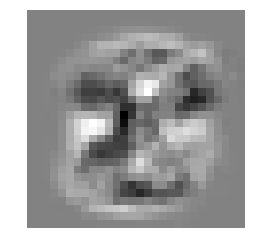

In [115]:
w_image = d1["w"].reshape(28,28)
plt.imshow(w_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

The image above specifies the weight image for 8. You can see some white pixel and black pixel where the black pixel is surrounded by the white pixel. You can say that the white pixel's have the least probability of indicating the digit 8 whereas the black pixel's have the highest probability of occourance of pixel at that position in the digits that is more likely to be 8. Weight vector is nothing but an image vector of 28x28 size indicating the pixel position of 8.

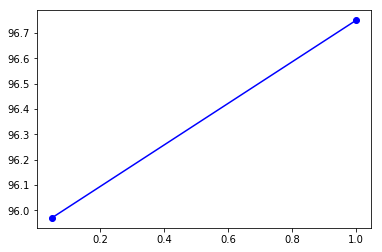

In [116]:
plt.plot([d1["learning_rate"], d2["learning_rate"]],[d1["train_accuracy"], d2["train_accuracy"]],"-bo")
plt.show()

This graph is between learning_rate and train_accuracy, and we can see that as the learning_rate increases there is some improvement in the accuracy. 

In [117]:
print(d2["train_accuracy"])

96.75
